### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 1: Naive Bayes Leaner for Adult Database


**Student Name(s):** Lang (Ron) Chen
<br>
**Student ID(s):** 1181506



Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook.

## General info

<b>Due date</b>: Friday, 8 April 2022 7pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: This iPython notebook is a template which you will use for your Assignment 1 submission. You need to only submitted the completed copy of this iPython notebook.

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count). Submissions more than 5 days late will not be accepted (resul in a mark of 0).
<ul>
    <li>one day late, -1.0;</li>
    <li>two days late, -2.0;</li>
    <li>three days late, -3.0;</li>
    <li>four days late, -4.0;</li>
    <li>five days late, -5.0;</li>
</ul>

<b>Extensions</b>: Students who are demonstrably unable to submit a full solution in time due to medical reasons or other trauma, may apply for an extension.  In these cases, you should email <a href="mailto:ni.ding@unimelb.edu.au">Ni Ding</a> as soon as possible after those circumstances arise. If you attend a GP or other health care service as a result of illness, be sure to provide a Health Professional Report (HPR) form (get it from the Special Consideration section of the Student Portal), you will need this form to be filled out if your illness develops into something that later requires a Special Consideration application to be lodged. You should scan the HPR form and send it with the extension requests.

<b>Marks</b>: This assignment will be marked out of 20, and make up 20% of your overall mark for this subject.

<b>Materials</b>: Use Jupyter Notebook and Python page on Canvas for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 2 marks for unreadable or exessively inefficient code.

8 of the marks available for this Project will be assigned to whether the four specified Python functions work in a manner consistent with the materials from COMP30027. Any other implementation will not be directly assessed (except insofar as it is required to make these five functions work correctly).

12 of the marks will be assigned to your responses to the questions, in terms of both accuracy and insightfulness. We will be looking for evidence that you have an implementation that allows you to explore the problem, but also that you have thought deeply about the data and the behaviour of the Naive Bayes classifier.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (ED -> Assignments -> A1); we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -5.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -3.0
</UL>
**NOTE: COMPLETE AND SUBMIT THIS FILE. YOU SHOULD IMPLEMENT FOUR FUNCTIONS AND INCLUDE YOUR ANSWERS TO THE QUESTIONS IN THIS FILE ONLY. NO OTHER SUBMISSION IS REQUIRED.**

**Keep your code clean. Adding proper comments to your code is MANDATORY.**

## Part 1: Base code [8 marks]

Instructions
1. Do **not** shuffle the data set
2. Treat the attributes as they are(e.g., do **not** convert numeric attributes to categorical or categorical to numeric). Implement a Naive Bayes classifier with appropriate likelihood function for each attribute.
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms.
4. You CANNOT have more than one train or predict function. Both continuous numeric attributes and categorical ones should be trained in one `train()` function, similarly for the `predict()`.  
5. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation
6. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)
7. You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find. 
8. You should add adequate comments to make your code easily comprehendible.*

In [1]:
# This function should prepare the data by reading it from a file and converting it into a useful format for training and testing
# and implement 90-10 splitting as specified in the project description.
import pandas as pd
import numpy as np

def preprocess(df):
    
    # split full dataframe into two dataframes x (attribute matrix) and y (labels)
    x = df[df.columns[:-1]]
    y = df[['label']]
    
    # run train_test_split 'manually' according to specification
    cutoff = int(0.9 * len(x))
    x_train = x.iloc[0:cutoff]
    x_test = x.iloc[cutoff:]
    y_train = y.iloc[0:cutoff]
    y_test = y.iloc[cutoff:]
    
    return x_train, x_test, y_train, y_test

In [2]:
# AFTER MUCH DELIBERATION, IT WAS DECIDED NOT TO ABSTRACT CERTAIN PARTS OF THE CODE INTO FUNCTIONS
# IN KEEPING WITH MAXIMISING READABILITY. NAIVE BAYES INVOLVES RATHER COMPLEX DATA STRUCTURES,
# AND KEEPING CODE IN 'CHRONOLOGICAL ORDER' UNDER ONE LARGER FUNCTION HAS BEEN DETERMINED TO
# PROVIDE BETTER READABILITY. GIVEN THERE ARE ONLY TWO CLASSES, REPEATED CODE IS RATHER MINIMAL.

# NOT THAT <100 LINES OF CODE IS A LOT - ESPECIALLY GIVEN MANY ARE COMMENTS


# Instructions for reading in file: place file called 'adult.csv' in directory './dataset'

In [3]:
# This function should calculat prior probabilities and likelihoods (conditional probabilities) 
# from the training data to build a Naive Bayes model

# hardcode the columns which contain numerical attributes
NUMERIC_ATTRBS = ['age', 'education num', 'hours per week']

def train(x_train, y_train):
    
    # prepare the data - put x and y back together so can divide dataframe by class
    train = x_train.copy()
    train['label'] = y_train
    
    train_c1 = train[train['label'] == ' <=50K']
    train_c2 = train[train['label'] == ' >50K']

    # Create master dictionaries for each class, which will: for prior and numerical attributes store tuples 
    # containing log likelihood / mean and standard deviation respectively, or for ordinal attributes store 
    # dictionaries which contain log observed probabilities of each value.
    
    # for each dictionary/tuple, it will be surrounded by a further tuple with the second tuple value denoting  
    # its status as a numerical attribute, ordinal attribute or prior.

    c1_dict = dict() # for ' <=50K'
    c2_dict = dict() # for ' >50K'
    
    # store the log prior probabilities as (prior log prob, 'prior')
    c1_dict['prior'] = (np.log(len(train_c1) / len(train)), 'prior')
    c2_dict['prior'] = (np.log(len(train_c2) / len(train)), 'prior')
    
    # iterate through the columns (use x_train to ensure the columns are attributes only)
    for col in x_train.columns:
        
        # if iterate to a column that is numeric (by comparing to hardcoded list)
        if col in NUMERIC_ATTRBS:
            
            # Prevent edge case of having '?' in numeric data which would cause np.mean and np.std to fail
            # by putting all numeric data values into a new list.
            tmp1 = list()
            tmp2 = list()
            
            for i in train_c1[col].index:
                if str(train_c1[col][i]).isnumeric(): # only put it in if it's numeric
                    tmp1.append(float(train_c1[col][i])) # ensure that the values are floats, not strings
                    # ** the problem is that if one value of the column is not numeric, then even numeric 
                    # values would be read in as strings by pandas, and would cause problems for subsequent phases
            
            for i in train_c2[col].index:
                if str(train_c2[col][i]).isnumeric():
                    tmp2.append(float(train_c2[col][i]))
             
            # store (mean, std) in ((mean, std), 'num')
            c1_dict[col] = ((np.mean(tmp1), np.std(tmp1) * np.sqrt(len(tmp1) / (len(tmp1)-1))), 'num')
            c2_dict[col] = ((np.mean(tmp2), np.std(tmp2) * np.sqrt(len(tmp2) / (len(tmp2)-1))), 'num')
            # as np.std() is /n^0.5, and we typically use unbiased /(n-1)^0.5, thus need to do *[n/(n-1)]^0.5
        
        # if find a column that is nominal
        else:
            
            # first find the set of all possible attribute values in the training set
            attrb_val = set()
            for val in train[col].value_counts().index:
                attrb_val.add(val)
            attrb_val = list(attrb_val)
            
            # for each value get its log observed probabilities (laplace smoothed alpha = 1)      
            tmp1 = dict()
            for i in range(len(train_c1[col].value_counts().index)):
                # logic: dict[attrb value] = log( (counts_of_this_attribute_value + 1) / (n+p) ) 
                tmp1[train_c1[col].value_counts().index[i]] = np.log( (train_c1[col].value_counts().values[i] + 1) 
                                                                     / (len(train_c1)+len(attrb_val)) )
            
            # for unseen attribute values that exist in train data but are of other class labels
            for i in range(len(attrb_val)):
                if attrb_val[i] not in train_c1[col].value_counts().index:
                    # logic: dict[unseen attrb value] = log(1/(n+p))
                    tmp1[attrb_val[i]] = np.log( 1 / (len(train_c1)+len(attrb_val)) )
            
            # store {value: log cond probability} in ({value: log cond probability}, 'nom')
            c1_dict[col] = (tmp1, 'nom')
            
            
            tmp2 = dict()
            for i in range(len(train_c2[col].value_counts().index)):
                tmp2[train_c2[col].value_counts().index[i]] = np.log( (train_c2[col].value_counts().values[i] + 1) 
                                                                     / (len(train_c2)+len(attrb_val)) )
            for i in range(len(attrb_val)):
                if attrb_val[i] not in train_c2[col].value_counts().index:
                    tmp2[attrb_val[i]] = np.log(1/(len(train_c2)+len(attrb_val)))
                
            c2_dict[col] = (tmp2, 'nom')
            
    
    return c1_dict, c2_dict


In [4]:
# This function should predict classes for new items in the testing data
import random

def predict(x_test, c1_dict, c2_dict):
    
    # re-index the test set to avoid problems when iterating
    x_test.index = range(len(x_test))
    
    # create lists to store final predictions and class probabilities
    y_pred = list()
    c1_log_prob = list()
    c2_log_prob = list()
    
    for i in range(len(x_test)):
        c1 = 0     # sum of log probabilities for ' <=50' (i.e. log relative postier prob)
        c2 = 0     # sum of log probabiliteis for ' >50' (i.e. log relative postier prob)
        
        # add the log prior probabilities
        c1 += c1_dict['prior'][0]
        c2 += c2_dict['prior'][0]
        
        for col in x_test.columns:
              
            if c1_dict[col][1] == 'num': # numeric attributes
                
                if str(x_test.loc[i][col]).isnumeric():
                    mean_c1 = c1_dict[col][0][0] # read mean value
                    std_c1 = c1_dict[col][0][1] # read std value
                    c1 += np.log(norm_pdf(float(x_test.loc[i][col]), mean_c1, std_c1)) # add log likelihood
                    
                    mean_c2 = c2_dict[col][0][0] 
                    std_c2 = c2_dict[col][0][1] 
                    c2 += np.log(norm_pdf(float(x_test.loc[i][col]), mean_c2, std_c2))
            
                else: # Skip this numerical attribute for this instance if value is "?"
                    pass      
                
            else: # nominal attributes
                
                if x_test.loc[i][col] in c1_dict[col][0]: 
                    # just comparing to the c1 prob set is enough because did laplace, so dict keys (unique attribute values) 
                    # should contain all training set unique attribute values
                    c1 += c1_dict[col][0][x_test.loc[i][col]] # add log conditional probability
                    c2 += c2_dict[col][0][x_test.loc[i][col]] 
                    
                else: # Skip this attribute for this instance if value has not been seen in training
                    pass
                    
        
        # record the sum log probabilities for the two classes for this particular test instance
        c1_log_prob.append(c1)
        c2_log_prob.append(c2)
        
        # record the appropriate prediction, based on the sum log probabilities of the two classes 
        # for this particular test instance
        if c1 > c2:
            y_pred.append(' <=50K')
        elif c1 < c2:
            y_pred.append(' >50K')
        else: # if equal then randomly allocate based on distribution of prior
            y_pred.append(random.choices([' <=50K', ' >50K'], weights = [np.exp(c1_dict['prior'][0]), 1-np.exp(c1_dict['prior'][0])])[0])
            
    return y_pred, c1_log_prob, c2_log_prob
    


def norm_pdf(x, mean, std):
    """ Helper function to calculate likelihood based on x value, and normal distribution hyperparameters
    mean and standard deviation """
    
    p = (1 / (std * np.sqrt(2 * np.pi))) * np.power(np.exp(1), (-1/2) * np.power((x - mean) / std, 2))

    return p

In [5]:
# This function should evaliate the prediction performance by comparing your model’s class outputs to ground
# truth labels, return and output accuracy, confusion matrix and F1 score.

def evaluate(y_pred, y_test):
    
    # create dataframe for y_pred and y_test
    df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test['label']})
    
    # calculate the accuracy
    accuracy = len(df[df['y_pred'] == df['y_test']])/len(df)
    
    # calculate tp, tn, fp, fn - assuming ' <=50K' is 'positive value'
    tp = len(df[(df['y_pred'] == ' <=50K') & (df['y_test'] == ' <=50K')]) 
    tn = len(df[(df['y_pred'] == ' >50K') & (df['y_test'] == ' >50K')]) 
    fp = len(df[(df['y_pred'] == ' <=50K') & (df['y_test'] == ' >50K')]) 
    fn = len(df[(df['y_pred'] == ' >50K') & (df['y_test'] == ' <=50K')]) 
    
    # build confusion matrix
    c_matrix = pd.DataFrame({'Pred <=50K': [tp, fp], 'Pred >50K': [fn, tn]}, 
                            index = ['Actual <=50K', 'Actual >50K'])
    
    
    # calculate precision, recall and use it to calcualte the F1 score
    precision = (tp/len(df))/(tp/len(df)+fp/len(df))
    recall = (tp/len(df))/(tp/len(df)+fn/len(df))
    F1 = 2*precision*recall/(precision+recall)
    
    return accuracy, c_matrix, F1


In [6]:
# This cell should act as your "main" function where you call the above functions 
# on the full ADULT data set, and print the evaluation score. [0.33 marks]

import pandas as pd
import numpy as np

# First, read in the data and apply your NB model to the ADULT data

# read in data. DATA MUST BE STORED IN DIRECTORY './dataset'
data = pd.read_csv('./dataset/adult.csv')

x_train, x_test, y_train, y_test = preprocess(data)

c1_dict, c2_dict = train(x_train, y_train)

y_pred, c1_log_prob, c2_log_prob = predict(x_test, c1_dict, c2_dict)

accuracy, c_matrix, F1 = evaluate(y_pred, y_test)

# Second, print the full evaluation results from the evaluate() function

# print accuracy
print("Accuracy:", accuracy)

# print confusion matrix
print("\nConfusion Matrix:\n")
display(c_matrix)

# print F1
print("\nF1:", F1)
print("\n")



# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of attributes, L the total number of labels
# The "class probabilities" may be unnormalized
# The "predicted class ID" must be in range (0, L)


print("Attribute vectors of instances [0, 1, 2]: ") # of the first three records in adult.csv
display(data.iloc[0:3, :])

print("\nNumber of instances (N): ", len(data))
print("Number of attributes (F): ", len(data.columns)-1) # exclude the label column
print("Number of labels (L): ", len(set(data['label'])))

# print out the prediction results of the last three instances
print("\n\nPredicted class log-probabilities for instance N-3: ", "\n\t <=50K:", c1_log_prob[-3], 
      "\n\t >50K:", c2_log_prob[-3])
print("Predicted class ID for instance N-3: ", y_pred[-3])
print("\nPredicted class log-probabilities for instance N-2: ", "\n\t <=50K:", c1_log_prob[-2], 
      "\n\t >50K:", c2_log_prob[-2])
print("Predicted class ID for instance N-2: ", y_pred[-2])
print("\nPredicted class log-probabilities for instance N-1: ", "\n\t <=50K:", c1_log_prob[-1], 
      "\n\t >50K:", c2_log_prob[-1])
print("Predicted class ID for instance N-1: ", y_pred[-1])


Accuracy: 0.86

Confusion Matrix:



,Pred <=50K,Pred >50K
Actual <=50K,69,8
Actual >50K,6,17



F1: 0.9078947368421053


Attribute vectors of instances [0, 1, 2]: 


,age,work class,education,education num,marital status,occupation,relationship,race,sex,hours per week,native country (region),label
0,68,?,1st-4th,2,Divorced,?,Not-in-family,White,Female,20,United-States,<=50K
1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K



Number of instances (N):  1000
Number of attributes (F):  11
Number of labels (L):  2


Predicted class log-probabilities for instance N-3:  
	 <=50K: -20.768165488458912 
	 >50K: -19.76217792549845
Predicted class ID for instance N-3:   >50K

Predicted class log-probabilities for instance N-2:  
	 <=50K: -25.310387321914632 
	 >50K: -22.803496285083625
Predicted class ID for instance N-2:   >50K

Predicted class log-probabilities for instance N-1:  
	 <=50K: -16.929982096849525 
	 >50K: -16.91915916100011
Predicted class ID for instance N-1:   >50K


## Part 2: Conceptual questions [8 marks for groups of 1] / [16 marks for groups of 2]


If you are in a group of 1, you should respond to Q1 and Q2.

If you are in a group of 2, you should respond to Q1, Q2, Q3 and Q4.

A response to a question should take about 100–250 words. You may need to develope codes or functions to help respond to the question here. 

#### NOTE: We strongly recommend <u>including figures or tables, etc.</u> to support your responses. The figures and tables inserted in Markdown cells must be reproducable by your code.

### Q1 [4 marks]
<u>Sensitivity</u> and <u>specificity</u> are two model evaluation metrics.  A good model should have both sensitivity and specificity high. Use the $2 \times 2$ confusion matrix returned by `evaluate()` to calculate the sensitivity and specificity. Do you see a difference between them? If so, what causes this difference? Provide suggestions to improve the model performance. 

In [7]:
# Write additional code here, if necessary (you may insert additional code cells)

# calculate sensitivity and specificity
tp = c_matrix.iloc[0,0]
tn = c_matrix.iloc[1,1]
fp = c_matrix.iloc[1,0]
fn = c_matrix.iloc[0,1]

sensitivity = (tp/len(y_pred))/(tp/len(y_pred)+fn/len(y_pred))
specificity = (tn/len(y_pred))/(tn/len(y_pred)+fp/len(y_pred))

print("Sensitvity: ", sensitivity)

print("Specificity: ", specificity)

Sensitvity:  0.8961038961038962
Specificity:  0.7391304347826088


In [8]:
# inspect counts of positive and negative labels in training se
y_train.value_counts()

label 
 <=50K    692
 >50K     208
dtype: int64

Provide your text answer of 150-200 words in this cell.

***Q1 Response**: The sensitivity of this model is 0.896 whilst specificity is 0.739. The difference is unsurprising as one measures the proportion of True Positive out of all the Actual Positives, whilst the other measures the proportion of True Negatives out of all the Actual Negatives (i.e. their numerator and denominator uses different statistics). A reason for sensitivity being higher could be that there are more than 3 times positively labelled attributes in the training set (692 to 208), and thus the model has better learnt how to predict positives.*

*One way to improve model performance could be to use alternative methods to deal with "?" classes, either ignoring them in training or attempting to impute their value by comparing with similar training instances and imputing using their value for this attribute. This is expected to improve performance because whilst "?"'s true value is unknown to us, different instances containing "?" in the same attribute likely has different true underlying values, and thus bluntly grouping all into a new class may be an incorrect assumption that distorts the model.*

*Another general suggestion is to collect more data, as more instances should help the model better learn the true behaviour.*


**Word Count: 197**

### Q2 [4 marks]
You can adopt different methods for training and/or testing, which will produce different results in model evaluation. 

(a) Instead of Gaussian, <u>implement KDE</u> for  $P(X_i|c_j)$ for numeric attributes $X_i$. Compare the evaluation results with Gaussian. Which one do you think is more suitable to model $P(X_i|c_j)$, Gaussian or KDE? Observe all numeric attributes and justify your answer.

You can choose an arbitrary value for kernel bandwidth $\sigma$ for KDE, but a value between 3 and 15 is recommended. You should write code to implement KDE, not call an existing function/method such as `KernelDensity` from `scikit-learn`.

In [9]:
#(a)

# This function should calculates prior probabilities and likelihoods (conditional probabilities) from the training data
# to build a naive Bayes model

def train_kde(x_train, y_train):
    
    # prepare the data
    train = x_train.copy()
    train['label'] = y_train
    
    train_c1 = train[train['label'] == ' <=50K']
    train_c2 = train[train['label'] == ' >50K']

    # Create master dictionaries for each classe, which will: for prior and numerical attributes store tuples 
    # containing log likelihood / mean and standard deviation respectively, or for ordinal attributes store 
    # dictionaries which contain log observed probabilities of each value.
    
    # for each dictionary/tuple, it will be surrounded by a further tuple to denote its status as numerical 
    # attribute, ordinal attribute or prior.

    c1_dict = dict()
    c2_dict = dict()
    
    # store the log prior probabilities 
    c1_dict['prior'] = (np.log( len(train_c1) / len(train) ), 'prior')
    c2_dict['prior'] = (np.log( len(train_c2) / len(train) ), 'prior')
    
    # iterate through the columns
    for col in x_train.columns:
        
        # if find a column that is numeric
        if col in NUMERIC_ATTRBS:
            
            # Prevent edge case of having '?' in numeric data which would cause np.mean and np.std to fail
            # by putting all numeric data values into a new list.
            tmp1 = list()
            tmp2 = list()
            
            # comment same as train()
            for i in train_c1[col].index:
                if str(train_c1[col][i]).isnumeric():
                    tmp1.append(int(train_c1[col][i]))
            
            for i in train_c2[col].index:
                if str(train_c2[col][i]).isnumeric():
                    tmp2.append(int(train_c2[col][i]))
            
            # This time for KDE just store whole list of numerical values into the tuple
            c1_dict[col] = (tmp1, 'num')
            c2_dict[col] = (tmp2, 'num')
        
        # if find a column that is nominal
        else:
            
            # first find the set of all possible attribute values in the train set
            attrb_val = set()
            for val in train[col].value_counts().index:
                attrb_val.add(val)
            attrb_val = list(attrb_val)

            
            # for each value get its log observed probabilities (laplace smoothed alpha = 1)      
            tmp1 = dict()
            for i in range(len(train_c1[col].value_counts().index)):
                # logic: dict[attrb value] = log( (counts_of_this_attribute_value + 1) / (n+p) ) 
                tmp1[train_c1[col].value_counts().index[i]] = np.log((train_c1[col].value_counts().values[i] + 1)/(len(train_c1)+len(attrb_val)))
            
            # for unseen attribute values that exist in train data but are of other class labels
            for i in range(len(attrb_val)):
                if attrb_val[i] not in train_c1[col].value_counts().index:
                    # logic: dict[unseen attrb value] = log(1/(n+p))
                    tmp1[attrb_val[i]] = np.log(1/(len(train_c1)+len(attrb_val)))
                
            c1_dict[col] = (tmp1, 'nom')
               
            tmp2 = dict()
            for i in range(len(train_c2[col].value_counts().index)):
                tmp2[train_c2[col].value_counts().index[i]] = np.log((train_c2[col].value_counts().values[i] + 1)/(len(train_c2)+len(attrb_val)))
            
            for i in range(len(attrb_val)):
                if attrb_val[i] not in train_c2[col].value_counts().index:
                    tmp2[attrb_val[i]] = np.log(1/(len(train_c2)+len(attrb_val)))
                
            c2_dict[col] = (tmp2, 'nom')
            
    
    return c1_dict, c2_dict


In [10]:
# This function should predict classes for new items in the testing data
from scipy.stats import norm

def predict_kde(x_test, c1_dict, c2_dict, STD):
    
    # re-index the test set
    x_test.index = range(len(x_test))
    
    # create lists to store final predictions and class probabilities
    y_pred = list()
    c1_log_prob = list()
    c2_log_prob = list()
    
    for i in range(len(x_test)): 
        c1 = 0     # sum of log probabilities for ' <=50' (i.e. log relative postier prob)
        c2 = 0     # sum of log probabiliteis for ' >50' (i.e. log relative postier prob)
         
        # add the log prior probabilities
        c1 += c1_dict['prior'][0]
        c2 += c2_dict['prior'][0]
        
        for col in x_test.columns:
            
            if c1_dict[col][1] == 'num':
                if str(x_test.loc[i][col]).isnumeric():
                    
                    kde_c1 = 0 # record sum(likelihoods based on KDE)
                    for j in range(len(c1_dict[col][0])): # add the log likelihoods based on KDE built by train instance value
                        kde_c1 += norm_pdf(float(x_test.loc[i][col]), c1_dict[col][0][j], STD) 
                    c1 += ( np.log(kde_c1) - np.log(len(c1_dict[col][0])) ) # log version of (1/N * sum(likelihoods based on KDE))

                    kde_c2 = 0
                    for j in range(len(c2_dict[col][0])):
                        kde_c2 += norm_pdf(float(x_test.loc[i][col]), c2_dict[col][0][j], STD)
                    c2 += ( np.log(kde_c2) - np.log(len(c2_dict[col][0])) )
                
                else: # Skip this numerical attribute for this instance if value is "?"
                    pass   
                
            else:

                if x_test.loc[i][col] in c1_dict[col][0]: 
                    # just comparing to the c1 prob set is enough because did laplace, so dict keys (unique attribute values) 
                    # should contain all training set unique attribute values
                    c1 += c1_dict[col][0][x_test.loc[i][col]] # add log conditional probablity
                    c2 += c2_dict[col][0][x_test.loc[i][col]]
                    
                else: # Skip this attribute for this instance if value has not been seen in training
                    pass
                         
        c1_log_prob.append(c1)
        c2_log_prob.append(c2)
        
        # record the appropriate prediction, based on the sum log probabilities of the two classes 
        # for this particular test instance
        if c1 > c2:
            y_pred.append(' <=50K')
        elif c1 < c2:
            y_pred.append(' >50K')
        else: # if equal then randomly allocate based on distribution of prior
            y_pred.append(random.choices([' <=50K', ' >50K'], weights = [np.exp(c1_dict['prior'][0]), 1-np.exp(c1_dict['prior'][0])])[0])
            
    return y_pred, c1_log_prob, c2_log_prob


In [11]:
# Main function for KDE

data = pd.read_csv('./dataset/adult.csv')

x_train, x_test, y_train, y_test = preprocess(data)

c1_dict_kde, c2_dict_kde = train_kde(x_train, y_train)

y_pred_kde, c1_prob_kde, c2_prob_kde = predict_kde(x_test, c1_dict_kde, c2_dict_kde, STD = 3)

accuracy_kde, c_matrix_kde, F1_kde = evaluate(y_pred_kde, y_test)

# Second, print the full evaluation results from the evaluate() function
print("Accuracy:", accuracy_kde)

print("\nConfusion Matrix:\n")
display(c_matrix_kde)

print("\nF1:", F1_kde)
print("\n")

Accuracy: 0.85

Confusion Matrix:



,Pred <=50K,Pred >50K
Actual <=50K,68,9
Actual >50K,6,17



F1: 0.9006622516556292




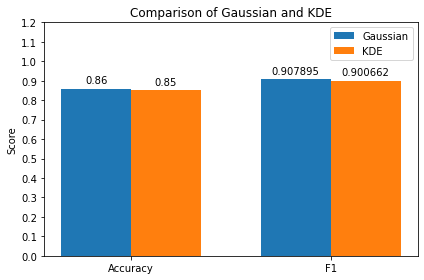

In [12]:
import matplotlib.pyplot as plt

labels = ['Accuracy', 'F1']
two_fold = [accuracy, F1]
ten_fold = [accuracy_kde, F1_kde]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, two_fold, width, label='Gaussian')
rects2 = ax.bar(x + width/2, ten_fold, width, label='KDE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Comparison of Gaussian and KDE')
plt.xticks(x, labels, rotation = 0);
plt.yticks([x/10 for x in range(13)])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

**Inspection of numerical values**

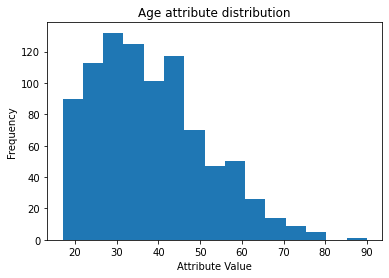

In [13]:
# Graph age, education number, hours
import matplotlib.pyplot as plt

plt.title('Age attribute distribution')
plt.xlabel('Attribute Value')
plt.ylabel('Frequency')
plt.hist(x_train['age'], bins = 15);

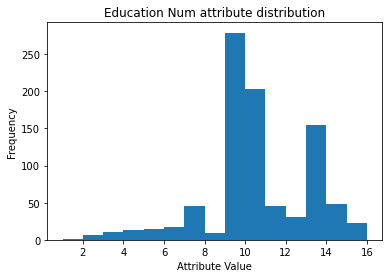

In [14]:
plt.title('Education Num attribute distribution')
plt.xlabel('Attribute Value')
plt.ylabel('Frequency')
plt.hist(x_train['education num'], bins = 15);

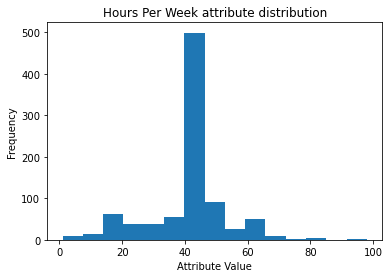

In [15]:
plt.title('Hours Per Week attribute distribution')
plt.xlabel('Attribute Value')
plt.ylabel('Frequency')
plt.hist(x_train['hours per week'], bins = 15);

***Q2a Response**: Observing the evaluation statistics, Gaussian performs just slightly better than KDE in terms of both Accuracy and F1 for this set of training statistics.*

*The distribution (observed from histograms) of the numerical attributes however point to a different direction: the ‘age’ attribute’s distribution is right-skewed, indicating that KDE should work better than Gaussian as it is non-symmetrical. The distribution of ‘education num’ is bimodal with peaks in 9-11 and 13-14, once again meaning KDE should work better as Gaussian assumes single mode. Finally, ‘hours per week’ has a single mode at 40-45 and thus should work better with Gaussian.*

*Overall, with two numeric attributes pointing to KDE as the more suitable option, and Gaussian’s evaluation statistics only leading KDE marginally, KDE should be used rather than Gaussian.*

*A better option would be to use KDE for ‘age’ and ‘education num’, and Gaussian for ‘hours per week’. This may require more inspection of data prior to training future model if more data arrives, and potentially causes issues for cross-validation; but assuming the training data generally captures the distribution of the whole set this shouldn’t be a problem, and would allow the model to utilise the best of both KDE and Gaussian.*

**Word Count: 200**

(b) Implement <u>10-fold and 2-fold cross-validations</u>.  
	Observe the evaluation results in each fold and the average accuracy, recall and specificity over all folds. 
	Comment on what is the effect by changing the values of $m$ in $m$-fold cross validation. (You can choose either Gaussian or KDE Naive Bayes.)

In [16]:
# b)
# Write additional code here, if necessary (you may insert additional code cells)
from sklearn.model_selection import KFold

x = data[data.columns[:-1]]
y = data[['label']]


In [17]:
k = 2
kf = KFold(n_splits = k, shuffle = False) # instantialise the KFold module

# Create lists for storing desired values
accuracy_score_2 = []
specification_score_2 = []
recall_score_2 = []

for train_index, test_index in kf.split(data):
    x_train, x_test = x.iloc[train_index, :], x.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    c1_dict, c2_dict = train(x_train, y_train)

    y_pred, c1_prob, c2_prob = predict(x_test, c1_dict, c2_dict)

    accuracy, c_matrix, F1 = evaluate(y_pred, y_test)
    
    # append the accuracy to the list
    accuracy_score_2.append(accuracy)
    
    # regain the four measures from the matrix
    tp = c_matrix.loc['Actual <=50K']['Pred <=50K']
    tn = c_matrix.loc['Actual >50K']['Pred >50K']
    fp = c_matrix.loc['Actual >50K']['Pred <=50K']
    fn = c_matrix.loc['Actual <=50K']['Pred >50K']
    
    # calculate specification
    specification = (tn/len(y_test)) / ( tn/len(y_test) + fp/len(y_test) )
    specification_score_2.append(specification)
     
    # calculate recall    
    recall = (tp/len(y_test)) / ( tp/len(y_test) + fn/len(y_test) )
    recall_score_2.append(recall)

# calculate mean scores out of all folds
mean_accuracy_2 = np.mean(accuracy_score_2)
mean_specification_2 = np.mean(specification_score_2)
mean_recall_2 = np.mean(recall_score_2)                                


In [18]:
k = 10
kf = KFold(n_splits = k, shuffle = False) # instantialise the KFold module

# Create lists for storing desired values
accuracy_score_10 = []
specification_score_10 = []
recall_score_10 = []

for train_index, test_index in kf.split(data):
    x_train, x_test = x.iloc[train_index, :], x.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    c1_dict, c2_dict = train(x_train, y_train)

    y_pred, c1_log_prob, c2_log_prob = predict(x_test, c1_dict, c2_dict)

    accuracy, c_matrix, F1 = evaluate(y_pred, y_test)
    
    # append the accuracy to the list
    accuracy_score_10.append(accuracy)
    
    # regain the four measures from the matrix
    tp = c_matrix.loc['Actual <=50K']['Pred <=50K']
    tn = c_matrix.loc['Actual >50K']['Pred >50K']
    fp = c_matrix.loc['Actual >50K']['Pred <=50K']
    fn = c_matrix.loc['Actual <=50K']['Pred >50K']
    
    # calculate specification
    specification = (tn/len(y_test)) / ( tn/len(y_test) + fp/len(y_test) )
    specification_score_10.append(specification)
     
    # calculate recall    
    recall = (tp/len(y_test)) / ( tp/len(y_test) + fn/len(y_test) )
    recall_score_10.append(recall)

# calculate mean scores out of all folds
mean_accuracy_10 = np.mean(accuracy_score_10)
mean_specification_10 = np.mean(specification_score_10)
mean_recall_10 = np.mean(recall_score_10)                                


In [19]:
print('Average Accuracy Score (2 fold): ', mean_accuracy_2)
print('Average Recall Score (2 fold): ', mean_recall_2)  
print('Average Specification Score (2 fold): ', mean_specification_2)                                
print('\n')

print('Average Accuracy Score (10 fold): ', mean_accuracy_10)
print('Average Recall Score (10 fold): ', mean_recall_10) 
print('Average Specification Score (10 fold): ', mean_specification_10)                                

Average Accuracy Score (2 fold):  0.821
Average Recall Score (2 fold):  0.8596703058836263
Average Specification Score (2 fold):  0.6939028048597571


Average Accuracy Score (10 fold):  0.8150000000000001
Average Recall Score (10 fold):  0.847512449866732
Average Specification Score (10 fold):  0.7078850304285086


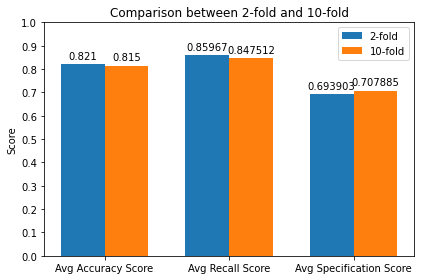

In [20]:
labels = ['Avg Accuracy Score', 'Avg Recall Score', 'Avg Specification Score']
two_fold = [mean_accuracy_2, mean_recall_2, mean_specification_2]
ten_fold = [mean_accuracy_10, mean_recall_10, mean_specification_10]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, two_fold, width, label='2-fold')
rects2 = ax.bar(x + width/2, ten_fold, width, label='10-fold')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Comparison between 2-fold and 10-fold')
plt.xticks(x, labels, rotation = 0);
plt.yticks([x/10 for x in range(11)])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

**Q2b Response***: The Average Accuracy Score is 0.821 and 0.815 for 2-fold and 10-fold respectively; the Average Recall Score is 0.8596 and 0.8475 and the Average Specification Score is 0.6939 and 0.7078 respectively.*

*For Average Accuracy and Recall Score, 2-fold has higher values than 10-fold; whilst for Average Specification Score, 10-fold has higher value than 2-fold. By the Central Limit Theorem, the mean scores of 10-fold should be closer to the true mean score of **this implementation of Naïve Bayes for this dataset**, and thus the 2-fold models are likely overfitting due to more randomness in the splits. Nonetheless, the differences are quite small.*

*Another effect on changing the m parameter for m-fold cross validation (though not directly related to the scores), is the number of test cases are different. As cross validation requires all instances used once as a test case, 2-fold means 50% of the instances are used as test and 10-fold means 10% of the instances are used as tests. Using less folds does mean less data is being used for training and generally should make the model worse in terms of generalisability.*

*Increasing m also increases computational time, as each fold needs to train one model.*


**Word Count: 198**

### Q3 [4 marks]
In `train()`, you are asked to treat the missing value of nominal attributes as a new category. There is another option (as suggested in Thu lecture in week 2): <u>ignoring the missing values</u>. 
Compare the two methods in both large and small datasets. Comment and explain your observations.
You can extract the first 50 records to construct a small dataset.Use Gaussian Naive Bayes only for this question.

In [21]:
# Write additional code here, if necessary (you may insert additional code cells

Provide your text answer of 150-200 words in this cell.

### Q4 [4 marks]
In week 4, we have learned how to obtain information gain (IG) and gain ratio (GR) to choose an attribute to split a node in a decision tree. We will see how to apply them in the Naive Bayes classification.

(a) Compute the GR of each attribute $X_i$, relative to the class distribution. In the Na\"ive Bayes classifier, remove attributes in the ascending order of GR: first, remove $P(X_i|c_j)$ such that $X_i$ has the least GR; second, remove $P(X_{i'}|c_j)$ such that $X_{i'}$ has the second least GR,......, until there is only one $X_{i*}$ with the largest GR remaining in the maximand $P(c_j) P(X_{i^*} | c_j)$. Observe the <u>change of the accuracy for both Gaussian and KDE</u> (Choose bandwidth $\sigma=10$ for KDE).

(b) Compute the IG between each pair of attributes. Describe and explain your observations. Choose an attribute and implement an estimator to predict the value of `education num`. Explain why you choose this attribute. Enumerate two other examples that an attribute can be used to estimate the other and explain the reason.  

In [22]:
# Write additional code here, if necessary (you may insert additional code cells)


### (a)

Provide your text answer to **Question 4.a** of 100-150 words in this cell.

### (b)

Provide your text answer to **Question 4.b** of 150-200 words in this cell.

<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: Lang (Ron) Chen
   
   <b>Dated</b>: 7/4/2022